## Observations and Insights 

In [283]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "./data/Mouse_metadata.csv"
study_results_path = "./data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
combinded_data = pd.DataFrame(combined_data)

# Display the data table for preview
combined_data.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [284]:
# Checking the number of mice.
combined_data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [285]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [286]:
# Checking the number of mice in the clean DataFrame.
cleaned_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
#cleaned_data.count()
len(cleaned_data["Mouse ID"].unique())

249

## Summary Statistics

In [287]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
trimmed_data = cleaned_data.loc[:, ["Drug Regimen", "Tumor Volume (mm3)"]]
grouped_data = trimmed_data.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
average = round(grouped_data.mean(), 2)
middle = round(grouped_data.median(), 2)
standard_dev = round(grouped_data.std(), 2)
variance = round(standard_dev**2)
standard_error = round(grouped_data.sem(), 2)
# Assemble the resulting series into a single summary dataframe.
summary_Tumor_Volume = pd.DataFrame({"Average": average["Tumor Volume (mm3)"], "Median": middle["Tumor Volume (mm3)"],"Variance": variance["Tumor Volume (mm3)"], "Standard Deviation": standard_dev["Tumor Volume (mm3)"], "SEM": standard_error["Tumor Volume (mm3)"]})
summary_Tumor_Volume.head()


,Average,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,25.0,4.99,0.33
Ceftamin,52.59,51.78,39.0,6.27,0.47
Infubinol,52.88,51.82,43.0,6.57,0.49
Ketapril,55.24,53.70,69.0,8.28,0.60
Naftisol,54.33,52.51,66.0,8.13,0.60


In [288]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
grouped_data.aggregate({"Tumor Volume (mm3)": ['mean', 'median', 'std', 'var', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.393463  50.909965  6.568014  43.138803  0.525862
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

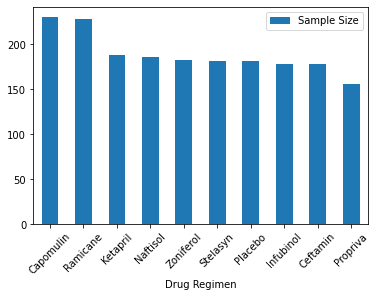

In [289]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
sample_size = cleaned_data["Drug Regimen"].value_counts()
sample_size = pd.DataFrame(sample_size)
sample_size = sample_size.reset_index(0)
sample_size = sample_size.rename(columns={"index":"Drug Regimen", "Drug Regimen":"Sample Size"})
sample_size
#x_values = np.arange(0, sample_size["Drug Regimen"].count(), 1)
sample_size.plot.bar(x="Drug Regimen", y="Sample Size", rot=45)

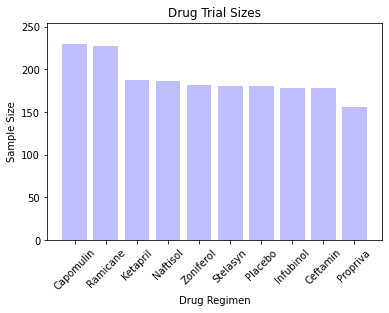

In [290]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_values = np.arange(0, sample_size["Sample Size"].count(), 1)
Drug_Regimen= sample_size["Drug Regimen"]
plt.xticks(x_values, Drug_Regimen, rotation=45)
plt.bar(x_values, sample_size["Sample Size"], color="blue", alpha=.25)
plt.ylim(0, max(sample_size["Sample Size"])+25)
plt.ylabel("Sample Size")
plt.xlabel("Drug Regimen")
plt.title("Drug Trial Sizes")
plt.show()

<AxesSubplot:title={'center':'Gender Proportion'}, ylabel='Sex'>

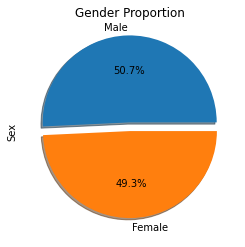

In [291]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_proportion = cleaned_data["Sex"].value_counts()
gender_proportion.plot.pie(title="Gender Proportion", explode=(0.1, 0), autopct="%1.1f%%", shadow=True)

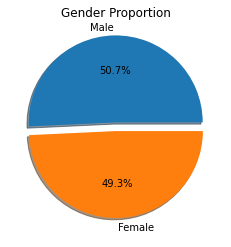

In [292]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_proportion, labels=["Male", "Female"], explode=(0.1,0), autopct="%1.1f%%", shadow=True)
plt.title("Gender Proportion")
plt.show()

## Quartiles, Outliers and Boxplots

In [293]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_regimens = cleaned_data.loc[(cleaned_data["Drug Regimen"]=='Capomulin') | (cleaned_data["Drug Regimen"]=='Ramicane') | (cleaned_data["Drug Regimen"]=='Infubinol') | (cleaned_data["Drug Regimen"]=='Ceftamin'), ["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
four_regimens = four_regimens.rename(columns={"Tumor Volume (mm3)":"Vol (mm3)"})
# Get data corresponding to last (greatest) Timepoint for each mouse
four_regimens_last = four_regimens.sort_values("Timepoint").groupby("Mouse ID").tail(1)
# Group by Drug Regimen
four_regimens_grouped = four_regimens_last.groupby("Drug Regimen")

C:\Users\esmit\anaconda3\envs\PythonDataConda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


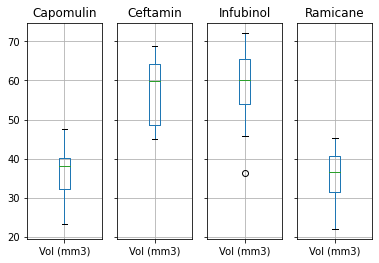

In [294]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
four_regimens_grouped.boxplot(column='Vol (mm3)', layout=(1,4))

plt.show()

In [317]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = four_regimens_grouped['Vol (mm3)'].quantile([0.25, 0.5, 0.75]).unstack()
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
IQR = upperq - lowerq


# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)
# sort values by timepoint, unique by mouse id, keep last
#print(four_regimens)
sorted_data = four_regimens.sort_values('Timepoint')
#print(sorted_data)
last_data = sorted_data.drop_duplicates(subset=['Mouse ID'], keep='last')
#print(last_data)
treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
volumes=[]
for drug in treatments:
        volumes = last_data.loc[last_data['Drug Regimen']==drug, ['Vol (mm3)']]
        
        print(f"{drug} lower outliers are {lower_outliers}")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Line and Scatter Plots

In [296]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [297]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [298]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
